In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
df= pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.isnull().values.any()

False

In [6]:
df["Amount"].head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

#this dataset is imbalanced dataset
#0 -> OK transaction
#1 -> FRAUD transaction 

In [7]:
df["Class"].value_counts()



0    284315
1       492
Name: Class, dtype: int64

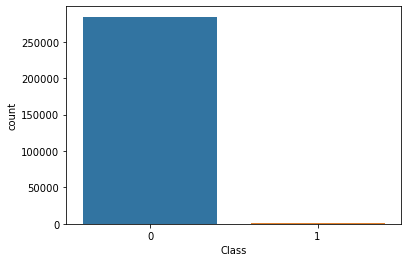

In [8]:
import seaborn as sns

sns.countplot(df['Class'])

# to ckeck the inter relation b/w differrent features 

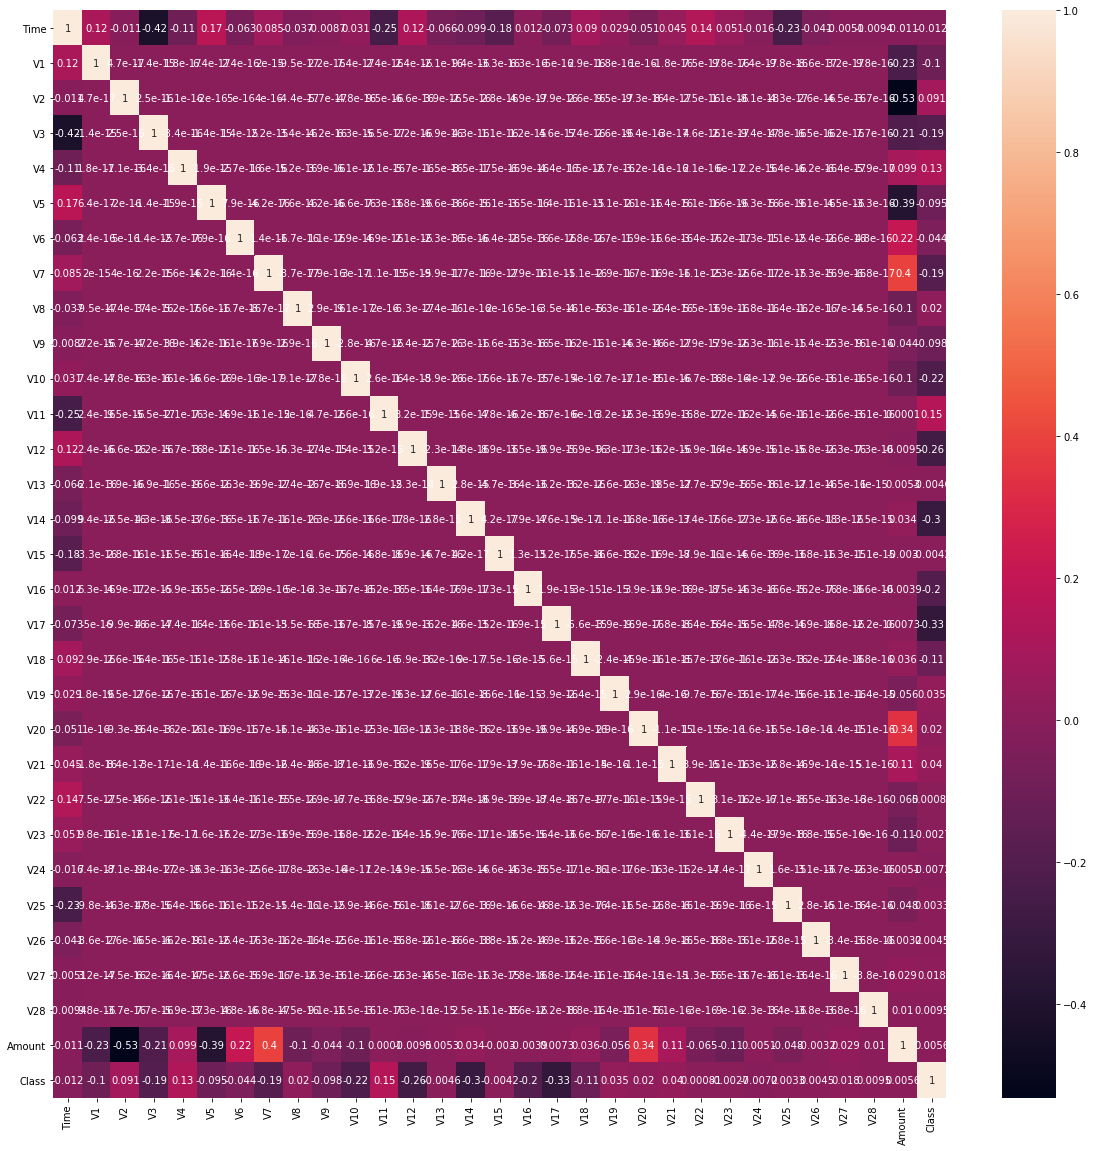

In [9]:

corr = df.corr()
plt.figure(figsize =(20,20))
sns.heatmap(corr,annot = True,linecolor = 'black')

#X1 is df of dependent features 
#Y1 is df of ID features


In [10]:

X1 = df.iloc[:,0:30]
Y1 = df.iloc[:,-1]

#handling imbalanced dataset using SMOTETomek package within combine module


In [11]:

from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state = 42)

X1_res,y1_res = smk.fit_sample(X1,Y1)

Using TensorFlow backend.


In [12]:
print(X1_res.shape,y1_res.shape)

(567562, 30) (567562,)


In [13]:
df1 = X1_res
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [14]:
type(y1_res)

pandas.core.series.Series

In [15]:

#columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
#columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
#target = "Class"
# Define a random state 
#state = np.random.RandomState(42)
#X = df[columns]
#Y = df[target]
# Print the shapes of X & Y
#print(X.shape)
#print(Y.shape)

# for selection best features we are going to use ExtraTreesClassifier method to extract k best features
#Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. 
#The more an attribute is used to make key decisions with decision trees, the higher its relative importance


In [16]:

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X1_res,y1_res)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [17]:
print(model.feature_importances_)

bestfeatures = pd.Series(model.feature_importances_,index = X1_res.columns)
print(bestfeatures)


[0.01034119 0.01895422 0.00980735 0.0685132  0.10867432 0.00666239
 0.00560583 0.02313586 0.00958409 0.03174427 0.06321093 0.10154657
 0.10512847 0.00692891 0.15660289 0.00527025 0.05509121 0.11171931
 0.03430982 0.01377283 0.00465897 0.00890375 0.00533894 0.00330992
 0.00649451 0.0040998  0.00546723 0.00672413 0.00395355 0.00444528]
Time      0.010341
V1        0.018954
V2        0.009807
V3        0.068513
V4        0.108674
V5        0.006662
V6        0.005606
V7        0.023136
V8        0.009584
V9        0.031744
V10       0.063211
V11       0.101547
V12       0.105128
V13       0.006929
V14       0.156603
V15       0.005270
V16       0.055091
V17       0.111719
V18       0.034310
V19       0.013773
V20       0.004659
V21       0.008904
V22       0.005339
V23       0.003310
V24       0.006495
V25       0.004100
V26       0.005467
V27       0.006724
V28       0.003954
Amount    0.004445
dtype: float64


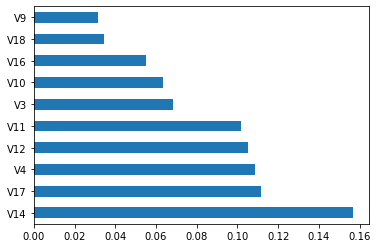

In [18]:
bestfeatures.nlargest(10).plot(kind = "barh")
plt.show()

#  dependent features that would be taken into consideration 

In [19]:

final_x_res = df1[["V18","V9","V16","V17","V3","V10","V11","V4","V12","V14"]]



*# using  train_test_split method  


In [20]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(final_x_res,y1_res,test_size  =0.3,random_state = 200)





# random forest classifier

In [21]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =10 ,criterion = "gini")
model = rfc.fit(x_train,y_train)

#prediction

pred = model.predict(x_test)


In [22]:
from sklearn.metrics import classification_report

print( classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85029
           1       1.00      1.00      1.00     85240

    accuracy                           1.00    170269
   macro avg       1.00      1.00      1.00    170269
weighted avg       1.00      1.00      1.00    170269



In [23]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,pred))

[[84994    35]
 [   44 85196]]


In [24]:
from sklearn.metrics import accuracy_score

acc_RFC = accuracy_score(y_test,pred)


# now we'll be using k fold method to split our data 

In [25]:

from sklearn.model_selection import cross_val_score

score = cross_val_score(rfc,final_x_res,y1_res,cv = 5)

In [26]:
print(score)
print(score.mean())

[0.99905738 0.99968286 0.99928642 0.99970047 0.99950666]
0.9994467567477757


**now we'll using StRATIFIEDKFold method to split the data 
**

In [27]:
from sklearn.model_selection import StratifiedKFold


accuracy = []
skf =  StratifiedKFold(n_splits = 5,random_state = None)
skf.get_n_splits(final_x_res,y1_res)

for train_index,test_index in skf.split(final_x_res,y1_res):
    print("train:", train_index,"test:", test_index)
    x1_train,x1_test = final_x_res.iloc[train_index],final_x_res.iloc[test_index]
    y1_train,y1_test = y1_res.iloc[train_index],y1_res[test_index]
    
    
    model1 = rfc.fit(x1_train,y1_train)
    pred1 = rfc.predict(x1_test)
    acc = accuracy_score(y1_test,pred1)
    accuracy.append(acc)
    
    
print(accuracy)

train: [ 56914  56915  56916 ... 567559 567560 567561] test: [     0      1      2 ... 340534 340535 340536]
train: [     0      1      2 ... 567559 567560 567561] test: [ 56914  56915  56916 ... 397291 397292 397293]
train: [     0      1      2 ... 567559 567560 567561] test: [113754 113755 113756 ... 454047 454048 454049]
train: [     0      1      2 ... 567559 567560 567561] test: [170629 170630 170631 ... 510803 510804 510805]
train: [     0      1      2 ... 510803 510804 510805] test: [227442 227443 227444 ... 567559 567560 567561]
[0.9989869001788342, 0.9997533322174552, 0.9991630840792163, 0.9996652336316865, 0.9996388047078723]


In [28]:
acc_skf = np.array(accuracy).mean()


# Logistic regression 

In [29]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()



In [30]:
score1 = (cross_val_score(lr,final_x_res,y1_res,cv = 5))
acc_lr = score1.mean()

# K nearest neighbour

In [31]:
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors = 50)


In [32]:
#indices,distance = mod2.kneighbors(final_x_res)

In [33]:
x1_train,x1_test,y1_train,y1_test = train_test_split(final_x_res,y1_res,test_size  =0.3,random_state = 200)


In [34]:
mod2 = kneigh.fit(x1_train,y1_train)
mod2predict = kneigh.predict(x1_test)
mod2predict[0:5]


array([1, 0, 0, 0, 0])

In [35]:
print(classification_report(y1_test,mod2predict))
acc_knn = accuracy_score(y1_test,mod2predict)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85029
           1       0.99      1.00      1.00     85240

    accuracy                           1.00    170269
   macro avg       1.00      1.00      1.00    170269
weighted avg       1.00      1.00      1.00    170269



# Hyperparameter tuning 

#from sklearn.model_selection import GridSearchCV
#from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          }
#Making models with hyper parameters sets
model1 = GridSearchCV(model2, param_grid=params)

model1.fit(x1_train,y1_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)

prediction=model2.predict(x1_test)



print("Accuracy:",metrics.accuracy_score(prediction,y1_test))

print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y1_test))


**Since ,It was taking a very long time to execute ,so i didn't execute it **

# SVM

**SVM was also taking a very long time to fit .**

from sklearn.svm import SVC

svc = SVC(C = 2,kernel = 'linear')

mod3 = svc.fit(x1_train,y1_train)


m_predict = mod3.predict(x1_test)

print("Accuracy:",metrics.accuracy_score(m_predict,y1_test))

print("Confusion Metrix:\n",metrics.confusion_matrix(m_predict,y1_test))


In [43]:
print("acc for random forest classifier :", acc_RFC)
print("acc for random forest classifier :" , acc_skf)
print("acc for logistic regression  :" , acc_lr)
print("acc for K nearesr neighbour  :" , acc_knn)



acc for random forest classifier : 0.9995360282846555
acc for random forest classifier : 0.9994414709630128
acc for logistic regression  : 0.9747516578633044
acc for K nearesr neighbour  : 0.9959182235169056
